In [1]:
import json
import pandas as pd
import time
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import os

trait_name = 'aggressive'
likert_data = pd.read_csv('./'+trait_name+'/likert_data.csv')

sub_num_dict = {}
sub_counter = 1
for sub_id in likert_data['subId']:
    if sub_id not in sub_num_dict:
        sub_num_dict[sub_id] = sub_counter
        sub_counter += 1

likert_data['subNum'] = likert_data['subId'].map(sub_num_dict)

img_num_dict = {}
img_counter = 0
for img_name in likert_data['imgName']:
    if img_name not in img_num_dict:
        img_num_dict[img_name] = img_counter
        img_counter += 1
        
likert_data['imgNum'] = likert_data['imgName'].map(img_num_dict)

likert_data = likert_data.sort_values(by=['subNum', 'imgNum'], ascending=True)
likert_data = likert_data[['subNum', 'imgNum', 'rating', 'rt', 'imgName', 'trial_index']]
likert_data['rating'] = likert_data['rating'].astype(np.int64)
likert_data.head()

,subNum,imgNum,rating,rt,imgName,trial_index
0,1,0,5,2630,071197.jpg,2
1,1,1,2,1899,043872.jpg,3
2,1,2,2,1389,151719.jpg,4
3,1,3,1,1283,032084.jpg,5
4,1,4,8,1756,110369.jpg,6


In [2]:
likert_data.shape

(1500, 6)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


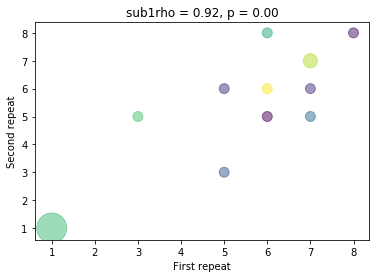

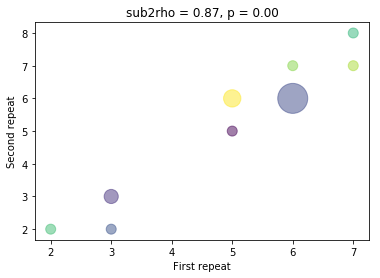

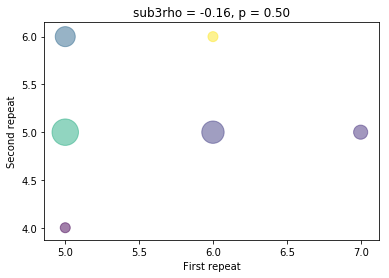

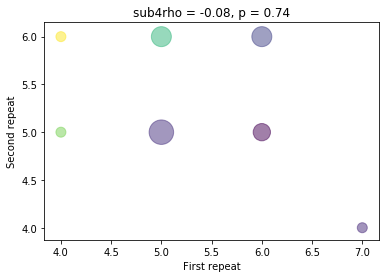

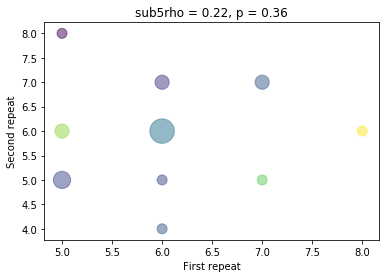

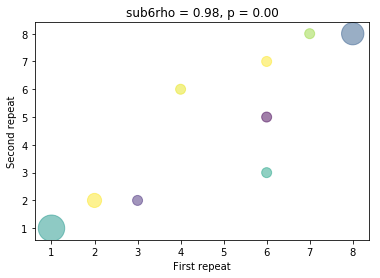

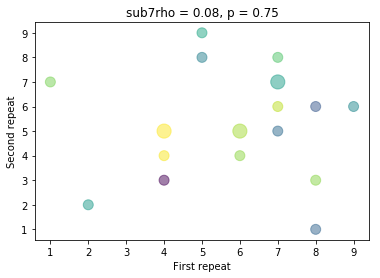

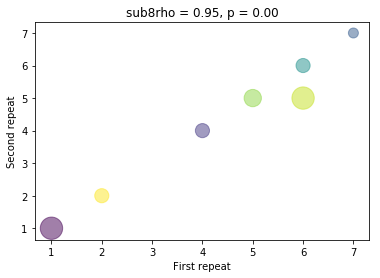

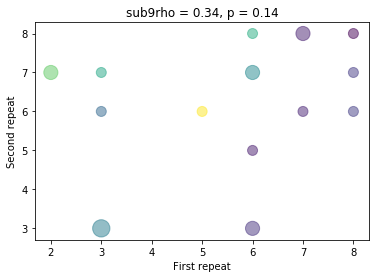

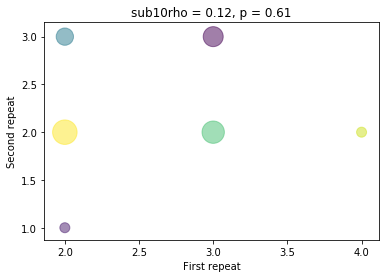

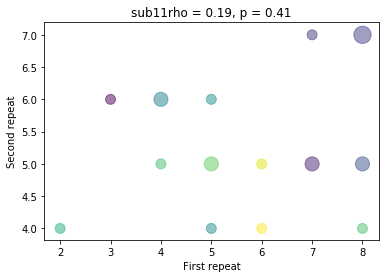

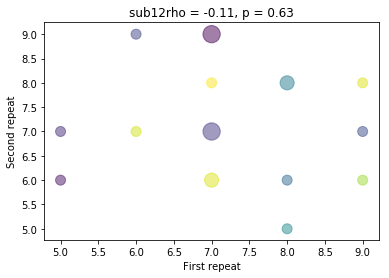

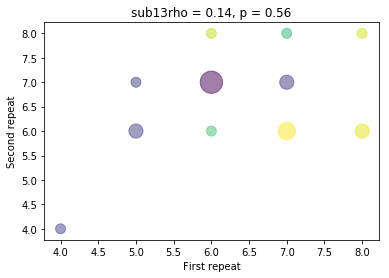

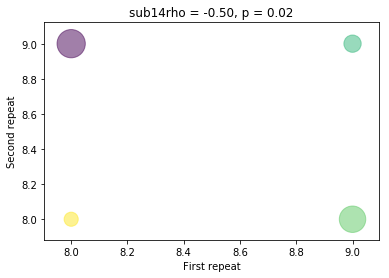

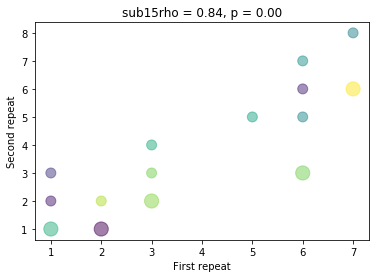

In [3]:
rho_lst = []
p_lst = []
for sub_num in range(1, 16):
    cur_sub_data = likert_data[likert_data['subNum']==sub_num]
    cur_sub_data['freq'] = cur_sub_data.groupby('imgNum')['imgNum'].transform('count')
    repeat_lst = cur_sub_data[cur_sub_data['freq']==2]
    p = repeat_lst.sort_values(by=['imgNum'])
    p1 = p[::2]
    p2 = p[1::2]
    
    first_half = p1['rating'].values
    second_half = p2['rating'].values
    rho, p = spearmanr(first_half, second_half)
    rho_lst.append(rho)
    p_lst.append(p)

    unique_coor = sorted(set(zip(first_half, second_half)))
    total_coor = list(zip(first_half, second_half))

    size = []

    for coor in unique_coor:
        size.append(total_coor.count(coor))

    x_unique_coor, y_unique_coor = zip(*unique_coor)

    colors = np.random.rand(len(x_unique_coor))

    plt.title('sub' + str(sub_num)+'rho = {:.2f}, p = {:.2f}'.format(rho, p))
    plt.xlabel('First repeat')
    plt.ylabel('Second repeat')
    plt.scatter(x_unique_coor, y_unique_coor, s=np.array(size)*100, alpha=0.5, c=colors)
    plt.show()

In [4]:
for i, (rho, p) in enumerate(zip(rho_lst, p_lst)):
    if p > 0.05:
        print i+1, rho, p

3 -0.16049922696540656 0.49906580516154253
4 -0.07945808413803326 0.7391389715122367
5 0.21688514631425138 0.3583646646340003
7 0.07760654781763145 0.7450217843689129
9 0.34470776377579027 0.13665119710244775
10 0.12006687661161239 0.6141126596379934
11 0.19427782882547287 0.411784793139064
12 -0.11314249385204493 0.6348309323613313
13 0.13694130141106878 0.5648111380316907


In [6]:
for i, (rho, p) in enumerate(zip(rho_lst, p_lst)):
    if p < 0.05 and rho > 0:
        print i+1, rho, p

1 0.9244279017893685 5.790850768644009e-09
2 0.8710009239552902 5.828056267070582e-07
6 0.9847177334464319 4.085686867846071e-15
8 0.9494617882126323 1.6992762677253446e-10
15 0.835478228777854 4.540634103437564e-06
